<h1 style="color: skyblue; text-align: center; font-size: 36px;"><b>Machine Learning Assignment 1 - Statistical Measures</b></h1>

<span style="color: white;"><b>You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:</b></span>

Dataset link: https://drive.google.com/file/d/1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P/view?usp=sharing

In [26]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q1. Perform basic EDA</b></h1>

In [34]:
# load the dataset
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [36]:
# Create a copy of the dataset
df2 = df.copy()
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [44]:
# Display first few rows
print("Displaying first few rows:")
df2.head(10)

Displaying first few rows:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [45]:
# Display last few rows
print("Displaying last few rows:")
df2.tail(10)

Displaying last few rows:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
13190,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.00,7,16666
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.00,1,3090


In [46]:
# Display shape of the dataset
df2.shape

(13200, 7)

In [47]:
# Display data type of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [48]:
# Display column names in the dataset
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [49]:
# Display statistical summary of numerical column
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [50]:
# Display missing/null values
missing_values = df2.isnull().sum()
print("Missing/Null values in each column:")
print(missing_values)

Missing/Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [51]:
# Display duplicate values in the dataset
df2.duplicated().sum()

1049

In [52]:
df2.shape

(13200, 7)

In [53]:
df2.drop_duplicates(inplace=True)

In [54]:
df2.shape

(12151, 7)

<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median:</b></h1>

<p>
<span style="color: skyblue;"><b>a) Mean and Standard deviation</b></span>
</p>
<p>
<span style="color: skyblue;"><b>b)Percentile method</b></span>
</p>
<p>
<span style="color: skyblue;"><b>c) IQR(Inter quartile range method)</b></span>
</p>
<p>
<span style="color: skyblue;"><b>d) Z Score method</b></span>
</p>

<b>a. Mean and Standard Deviation Method</b>

<b>In this method, we will calculate the mean and standard deviation for the price_per_sqft column. After that we will establish an acceptable range (3*std). All the values beyond these ranges will be removed.</b>

In [57]:
mean = df2['price_per_sqft'].mean()
std = df2['price_per_sqft'].std()
threshold = 3
lower_limit = mean - threshold * std
upper_limit = mean + threshold * std

df2_trimmed_mean_std = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_mean_std)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 5


<b>b. Percentile Method</b>

<b>In this method, we will define 5th and 95th percentile for the price_per_sqft column. All the values less than 5th percentile and greater than 95th percentile will be removed.</b>

In [60]:
lower_limit = np.percentile(df2['price_per_sqft'], 5)
upper_limit = np.percentile(df2['price_per_sqft'], 95)

df2_trimmed_percentiles = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_percentiles)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 1211


<b>c. IQR (Inter Quartile Range Method)</b>

<b>In this method, we will establish 25th and 75th percentile (Q1 and Q3 respectively). All values that do not fall within this range will be removed</b>

In [63]:
Q1 = df2['price_per_sqft'].quantile(0.25)
Q3 = df2['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df2_trimmed_IQR = df2[(df2['price_per_sqft'] >= lower_limit) & (df2['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df2) - len(df2_trimmed_IQR)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 1142


<b>d. Z-Score Method</b>

<b>In this method, Z-Score defines the number of standard deviation a data point is from the mean. If the Z-Score is beyond an acceptable range (3*std), we will remove those values.</b>

In [66]:
from scipy.stats import zscore

# Calculate Z-scores for the 'price_per_sqft' column
df2['z_score'] = zscore(df2['price_per_sqft'])

# Define the critical value
critical_value = 3

# Remove rows where the Z-score is greater than 3 or less than -3
df2_trimmed_z_score = df2[(df2['z_score'] > critical_value) | (df2['z_score'] < -critical_value)]

# Check the number of rows removed
rows_cleared = len(df2) - len(df2_trimmed_z_score)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 12146


In [67]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039861
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031625
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034412
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016971
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034907
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014409
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026777
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025845


In [ ]:
<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?</b></h1>

<b>Box Plot of Original Data</b>

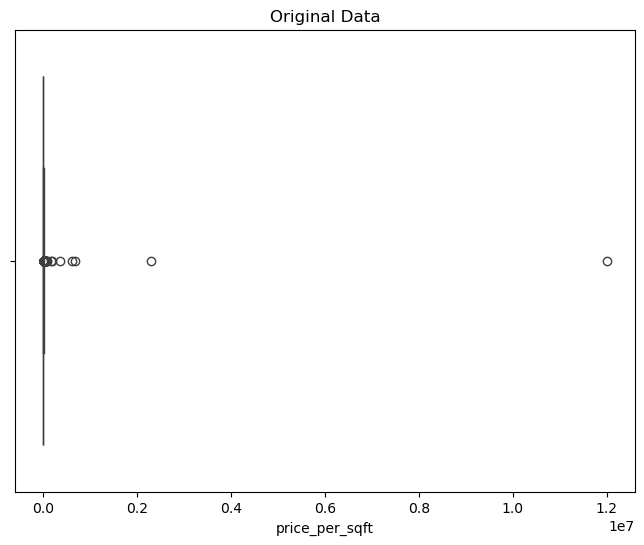

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['price_per_sqft'])
plt.title('Original Data')
plt.show()

<b>Box Plot of Mean and Standard Deviation Method</b>

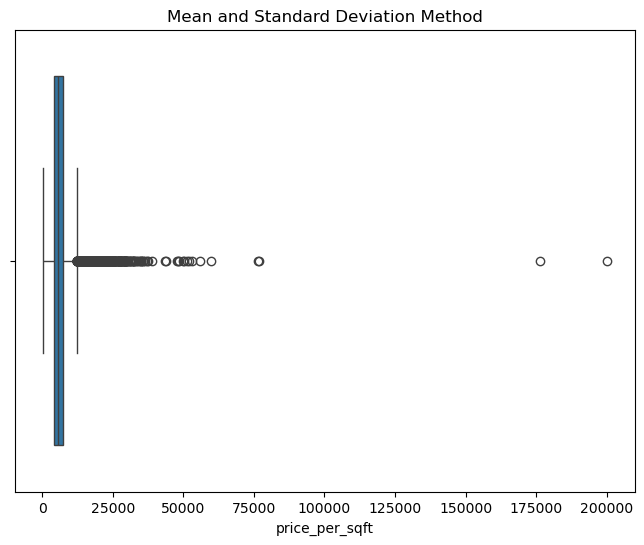

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_mean_std['price_per_sqft'])
plt.title('Mean and Standard Deviation Method')
plt.show()

<b>Box Plot of Percentile Method</b>

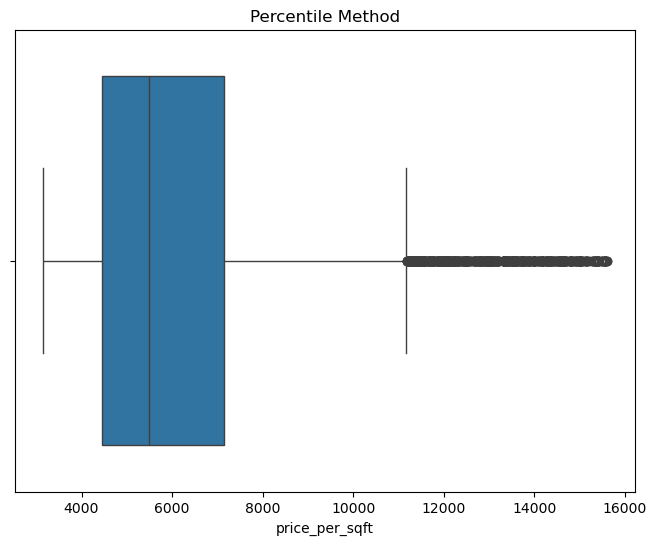

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_percentiles['price_per_sqft'])
plt.title('Percentile Method')
plt.show()

<b>Box Plot of IQR</b>

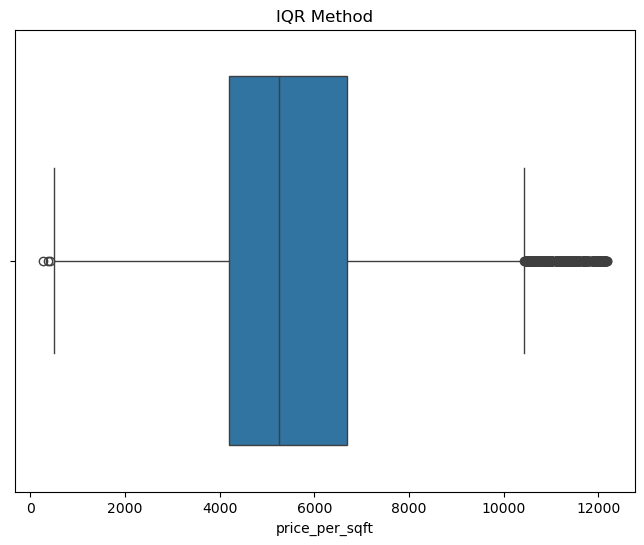

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_IQR['price_per_sqft'])
plt.title('IQR Method')
plt.show()

<b>Box Plot of Z-Score Method</b>

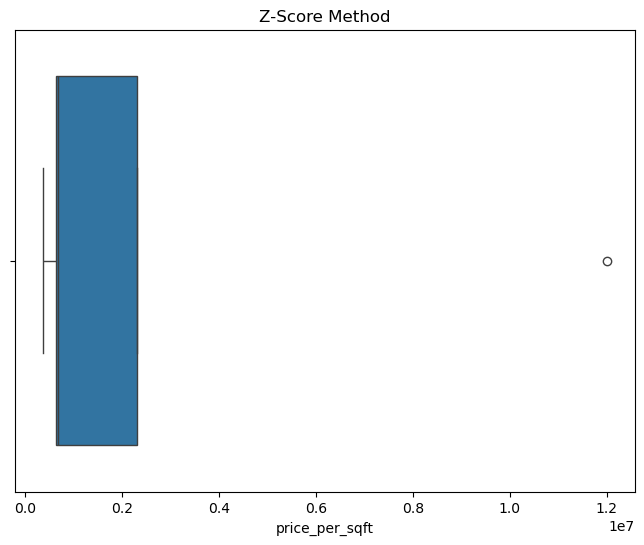

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2_trimmed_z_score['price_per_sqft'])
plt.title('Z-Score Method')
plt.show()

<b>IQR Method: This method strikes a balance between removing extreme outliers and retaining the core structure of the dataset.</b>
<b>Percentile Method: A close second, particularly if you aim to preserve more data by adjusting the percentiles.</b>

<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.</b></h1>

In [118]:
# Skewness and Kurtosis BEFORE transformation
import scipy.stats as stats
original_skewness = stats.skew(df2['price_per_sqft'])
original_kurtosis = stats.kurtosis(df2['price_per_sqft'])

print("Original Skewness:", original_skewness)
print("Original Kurtosis:", original_kurtosis)

Original Skewness: 103.88920549434178
Original Kurtosis: 11131.230839805388


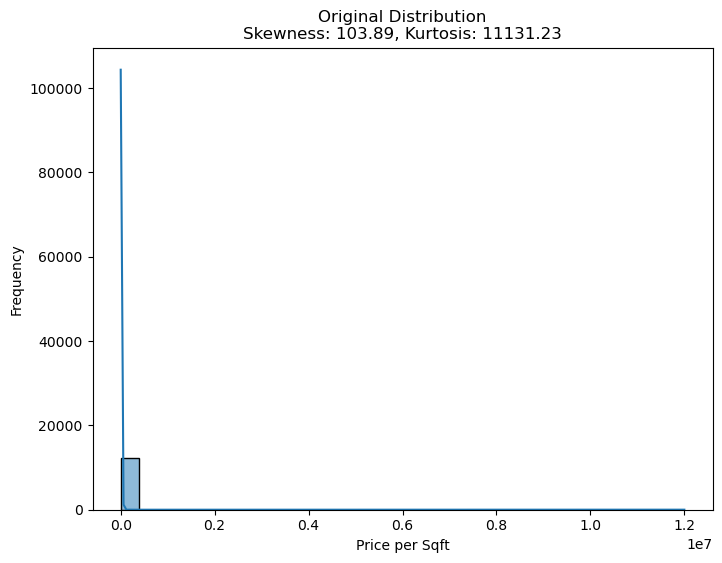

In [134]:
# Hisplot to check normality of price_per_sqft column
plt.figure(figsize=(8, 6))
sns.histplot(df2['price_per_sqft'], kde=True, bins=30)
plt.title(f'Original Distribution\nSkewness: {original_skewness:.2f}, Kurtosis: {original_kurtosis:.2f}')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [128]:
# Apply Log Transformation
df2['log_price_per_sqft'] = np.log1p(df2['price_per_sqft'])

In [130]:
# Skewness and Kurtosis AFTER Log Transformation
import scipy.stats as stats
log_skewness = stats.skew(df2['log_price_per_sqft'])
log_kurtosis = stats.kurtosis(df2['log_price_per_sqft'])

print("Log Transformation Skewness:", log_skewness)
print("Log Transformation Kurtosis:", log_kurtosis)

Log Transformation Skewness: 1.400870354404583
Log Transformation Kurtosis: 9.404434549652514


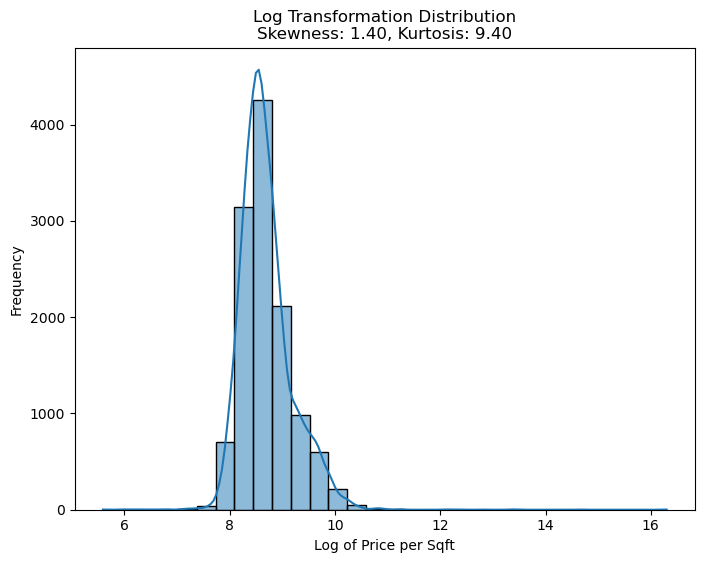

In [136]:
# Hisplot to check normality of AFTER Log Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df2['log_price_per_sqft'], kde=True, bins=30)
plt.title(f'Log Transformation Distribution\nSkewness: {log_skewness:.2f}, Kurtosis: {log_kurtosis:.2f}')
plt.xlabel('Log of Price per Sqft')
plt.ylabel('Frequency')
plt.show()

<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q5. Check the correlation between all the numerical columns and plot heatmap.</b></h1>

In [139]:
# View the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             12151 non-null  object 
 1   size                 12151 non-null  object 
 2   total_sqft           12151 non-null  float64
 3   bath                 12151 non-null  float64
 4   price                12151 non-null  float64
 5   bhk                  12151 non-null  int64  
 6   price_per_sqft       12151 non-null  int64  
 7   z_score              12151 non-null  float64
 8   sqrt_price_per_sqft  12151 non-null  float64
 9   log_price_per_sqft   12151 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.0+ MB


In [143]:
# Select numerical columns to create a correlation matrix
num_columns = df2[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']]

# Calculate the correlation matrix
correlation_matrix = num_columns.corr()
correlation_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


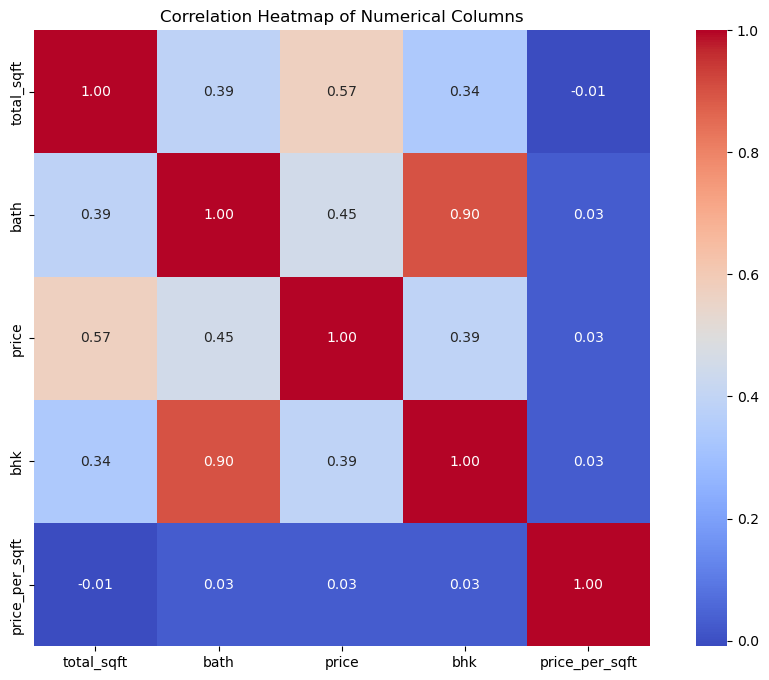

In [145]:
# Plot Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

<h1 style="color: skyblue; text-align: center; font-size: 20px;"><b>Q6. Draw Scatter plot between the variables to check the correlation between them.</b></h1>

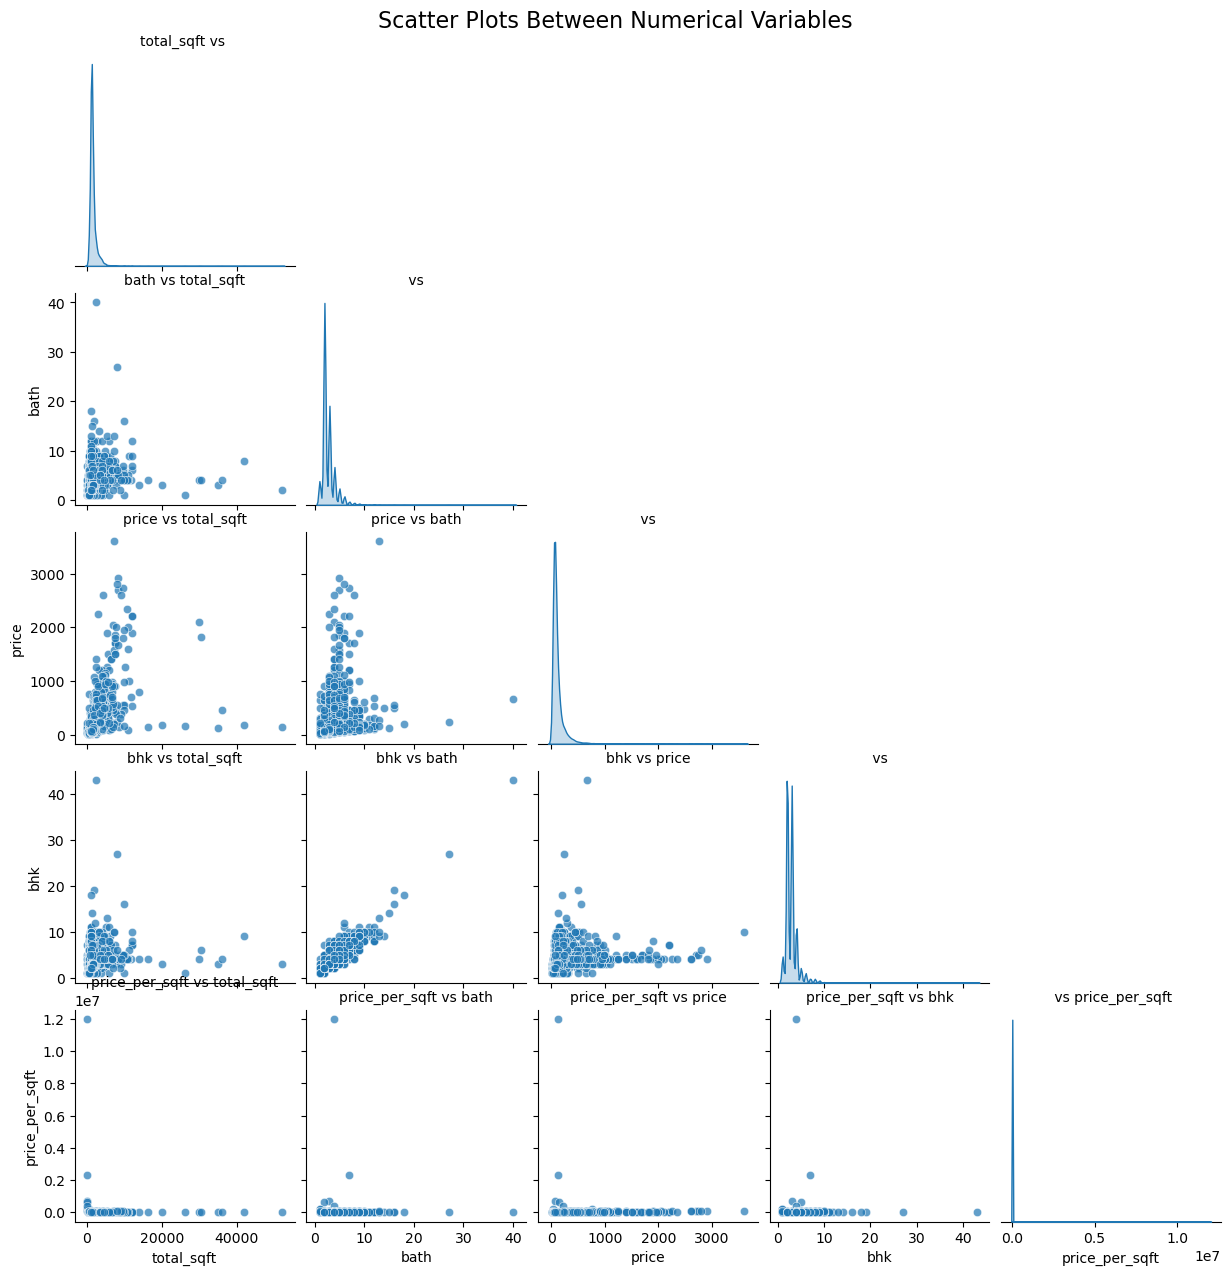

In [157]:
# Select numerical columns only
num_columns = df2[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']]

# Pairplot to create scatter plots between each pair of variables
pairplot = sns.pairplot(num_columns, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
# Add labels and titles
for ax in pairplot.axes.flat:
    if ax:  # Check if the subplot exists (some may be None due to corner=True)
        ax.set_xlabel(ax.get_xlabel(), fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
        ax.set_title(f'{ax.get_ylabel()} vs {ax.get_xlabel()}', fontsize=10, loc='center')
plt.suptitle('Scatter Plots Between Numerical Variables', y=1.02, fontsize=16)
plt.show()

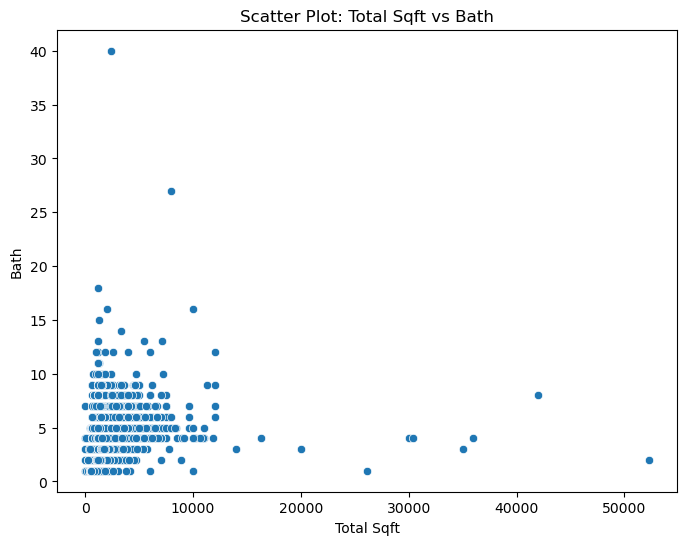

In [54]:
# Total Sqft vs Bath
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='bath',data=df2)
plt.title('Scatter Plot: Total Sqft vs Bath')
plt.xlabel('Total Sqft')
plt.ylabel('Bath')
plt.show()

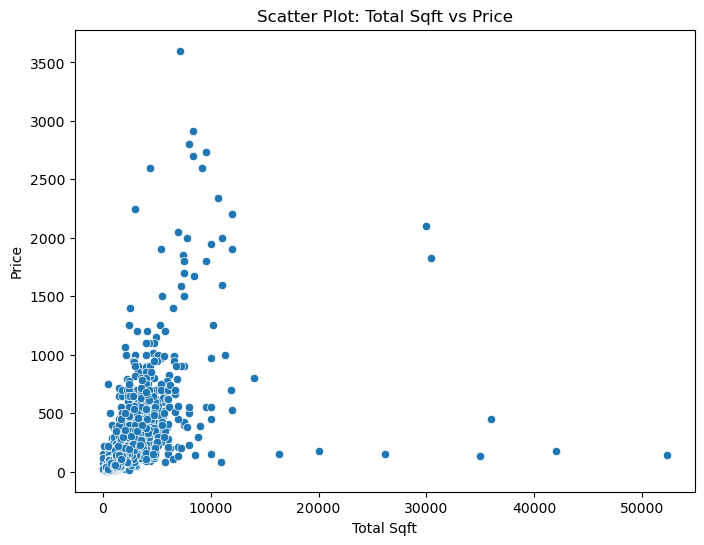

In [163]:
# Total_sqft vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price',data=df2)
plt.title('Scatter Plot: Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

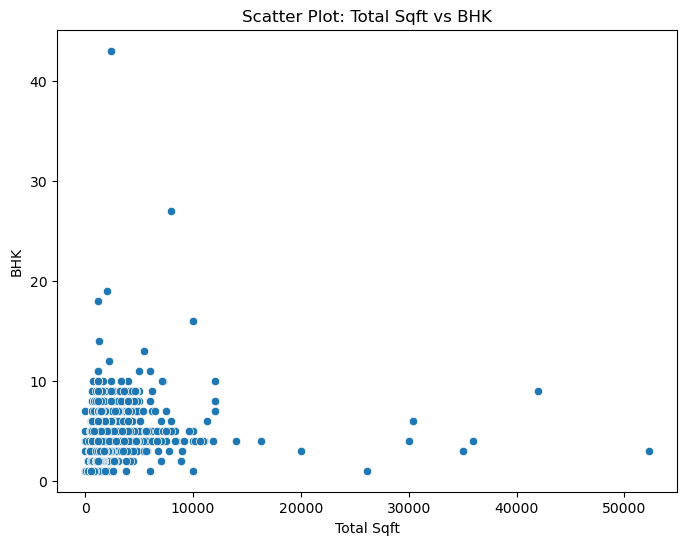

In [56]:
# Total_Sqft vs BHK
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='bhk',data=df2)
plt.title('Scatter Plot: Total Sqft vs BHK')
plt.xlabel('Total Sqft')
plt.ylabel('BHK')
plt.show()

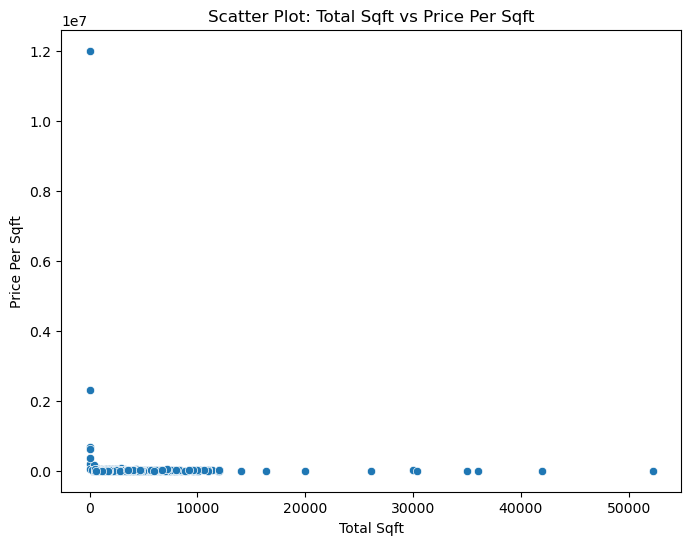

In [38]:
# Total_sqft vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Total Sqft vs Price Per Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price Per Sqft')
plt.show()

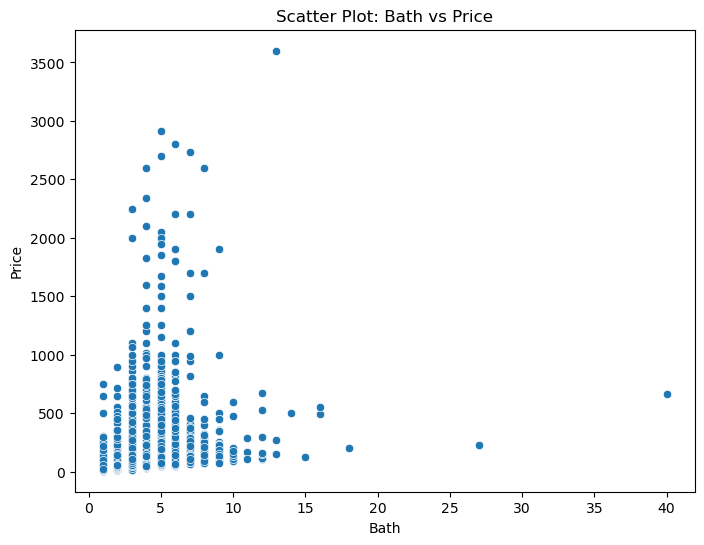

In [161]:
# Bath vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price',data=df2)
plt.title('Scatter Plot: Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()

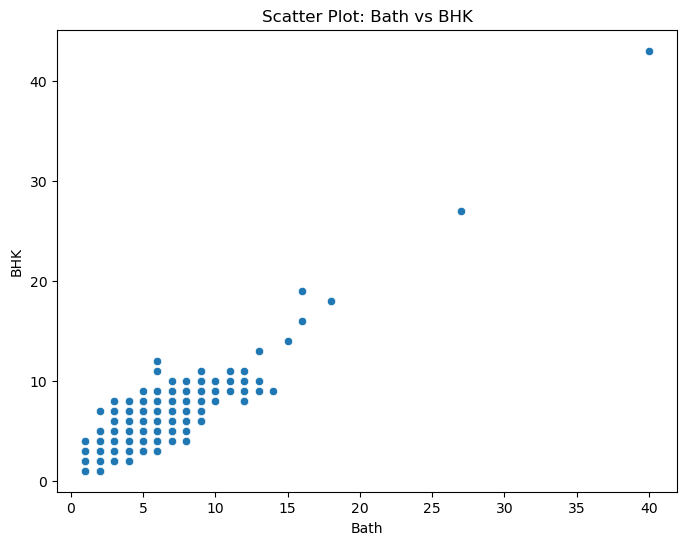

In [48]:
# Bath vs BHK
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='bhk',data=df2)
plt.title('Scatter Plot: Bath vs BHK')
plt.xlabel('Bath')
plt.ylabel('BHK')
plt.show()

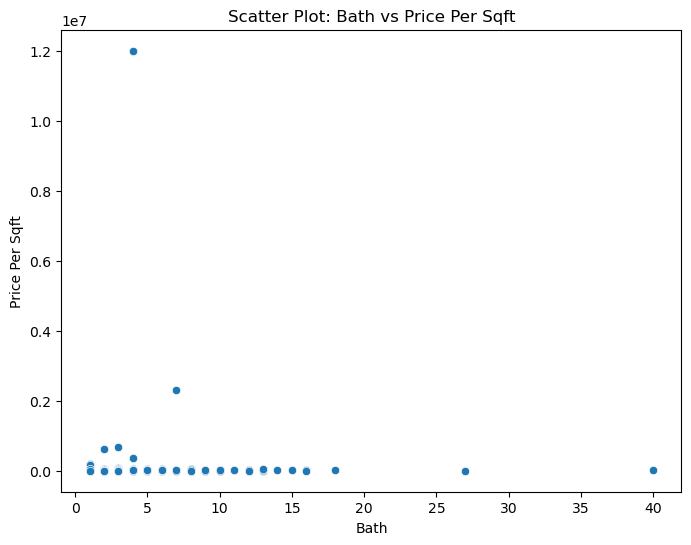

In [46]:
# Bath vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Bath vs Price Per Sqft')
plt.xlabel('Bath')
plt.ylabel('Price Per Sqft')
plt.show()

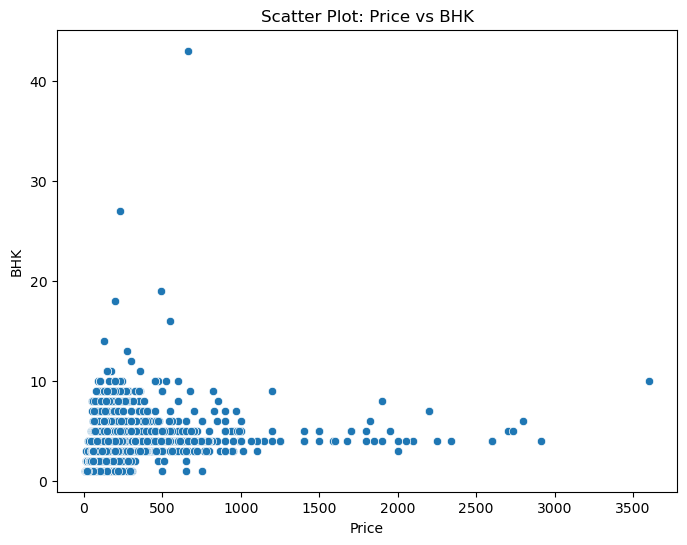

In [58]:
# Price vs BHK
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='bhk',data=df2)
plt.title('Scatter Plot: Price vs BHK')
plt.xlabel('Price')
plt.ylabel('BHK')
plt.show()

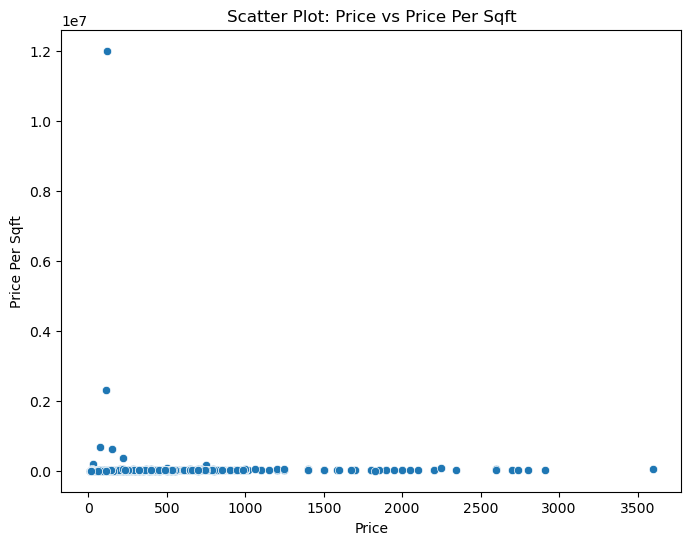

In [60]:
# Price vs Price Per Sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: Price vs Price Per Sqft')
plt.xlabel('Price')
plt.ylabel('Price Per Sqft')
plt.show()

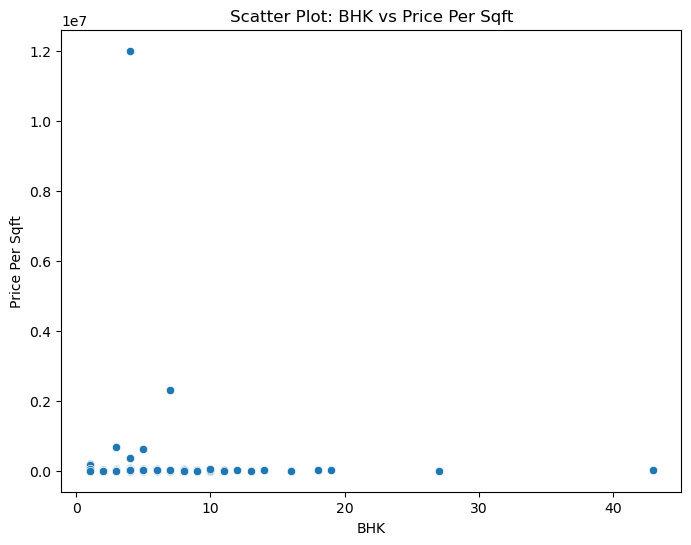

In [40]:
# BHK vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price_per_sqft',data=df2)
plt.title('Scatter Plot: BHK vs Price Per Sqft')
plt.xlabel('BHK')
plt.ylabel('Price Per Sqft')
plt.show()